#Homework 4

Copy this notebook. Rename it as: YOURNAME-HW4-matplotlib-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

.

Upload your completed jupyter notebook to elearning site in a zip labeled with your name, as a minimum something like YOURNAME-HW4.zip Do not put this notebook on your github.

Couple of reference site:
<ul>
<li/>http://matplotlib.org/examples/pylab_examples/
<li/>http://docs.scipy.org/doc/numpy/
</ul>

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. To do more to create tutorials on how to create an interesting plot or set of plots that are not in this HW.

Describe what you are doing so others can follow in creating the plots.

+ Available on : https://github.com/kantaki/big-data-python-class/tree/master/Homeworks/Homework4

#### Homework 4.1

4.1.a Create a figure with two subplots in a row.
One shows a sine wave of x from with x = 0 ... 2*pi the other shows the tagent of x with the same range.
Label the figures.

Should look something like:
<img src="./images/Figure_with_multipleplot.png" width="300" height="200">



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

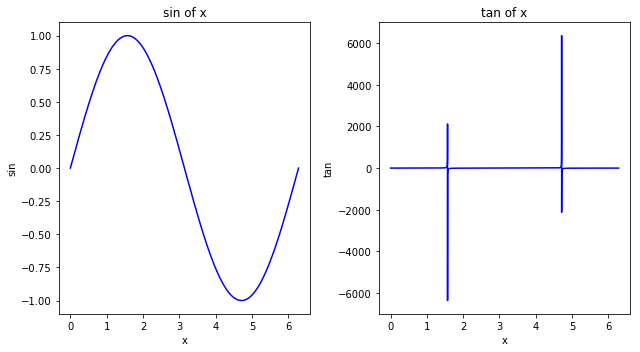

In [2]:
fig = plt.figure(figsize=(9,5))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('x')
ax1.set_ylabel('sin')
ax1.set_title("sin of x")

X = np.linspace(0, np.pi*2, 10000, endpoint=True)
S = np.sin(X)
plt.plot(X, S, 'b')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('x')
ax2.set_ylabel('tan')
ax2.set_title('tan of x')

T = np.tan(X)
plt.plot(X, T, 'b')

plt.tight_layout()
plt.savefig("sinTan.png", dpi=150)

#### Homework 4.2
 

Make a combined plot of a  red spiral with a scatter plot.

The red spiral has r from 0 to 3 with steps of 0.1 and
a theta of 2 * pi * r.

The scatter uses the same theta as the spiral but the radius r is offset by a random value ranging from -.5 to .5.
The size of the plotted locations is 100 * r^2 and the color uses theta.

Use an alpha value of .4 for the colors in the scatter plot.
Limit the size of the plot (rmax) to 2.5
 
 Should look something like:
<img src="./images/lineplot_with_scatterplot.png" width="300" height="200">


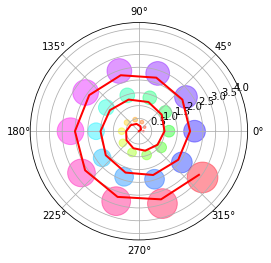

In [3]:
import random

r = np.arange(0, 3, 0.1, dtype=float)
theta = 2 * np.pi * r


colors = theta
r2 = r - random.random()*(-.5-.5) + -.5 # random.random()*(high-low) + low
area = 100 * r2**2
ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r2,  s=area, c=colors,  cmap='hsv', alpha=0.4)
ax.plot(theta, r, linewidth=2, color='r');

plt.show()

#### Homework 4.3
Create a 2d histogram of 100000 points

x is a generated from a normal random distribution 

y is generated from a geometric random value witha p=.01 
Use the LogNorm color settings for hist2d.
And show the colorbar as well.

Should look something like:
<img src="./images/2d_histogram.png" width="300" height="200">


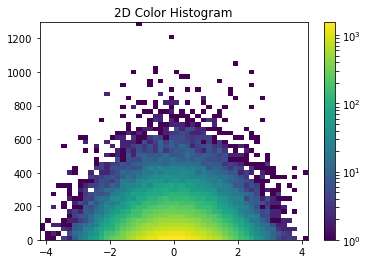

In [4]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np


x = np.random.randn(100000)
y = np.random.geometric(0.01, size=100000)


plt.hist2d(x, y, bins=50, norm=LogNorm())
plt.colorbar()
plt.title("2D Color Histogram")
plt.show()

#### Homework 4.4
Show the same data in homewowrk 4.3 in a 3d plot.
Use a numpy.histrogram2d funtion to generate the data:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Need to use statements:

<em>from mpl_toolkits.mplot3d import Axes<br/>
fig = plt.figure()<br/>
ax = fig.gca(projection='3d')</em>

...

ax.plot_surface(xm,ym,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

</em>

Should look something like:
<img src="./images/3dplot.png" width="300" height="200">


### https://matplotlib.org/examples/mplot3d/hist3d_demo.html

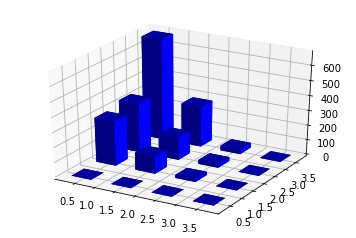

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Data
x = np.random.randn(100000)
y = np.random.geometric(0.01, size=100000)

#Histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])


xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

I could not do it with ax.plot_surface, followed the tutorial for the bar3d method for our data
+ tried the other tutorial http://matplotlib.org/examples/index.html

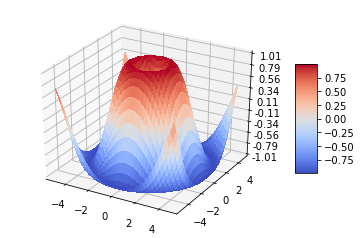

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Heat map of the normal distribution
### using Hexbin()

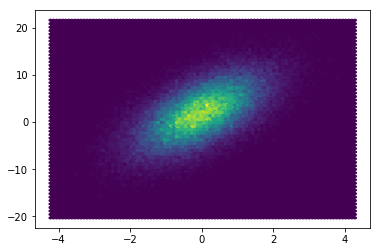

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
plt.hexbin(x,y)

# Pie Charts

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("data/dataTrain.csv") #Reading the dataset in a dataframe using Pandas

df.head(5)
Married_Rows = df.groupby(['Married'])
p = Married_Rows.size() 
p # Number of married people in the dataset

Married
No     213
Yes    398
dtype: int64

[213, 398]


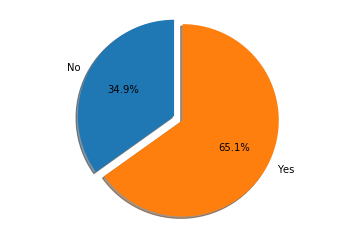

In [9]:
# Pie chart
labels = 'No', 'Yes'
sizes = [num for num in p]
print sizes
explode = (0, 0.1)  # "explode" the 2nd slice ('No')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio (circle)

plt.show()

The majority of our data sets of people asking for loans are married. 
The pie chart allows a clear visualization of these results. (even transforms the data into percentages for you)

## Matrix 

+ generates a Matrix correlation diagram using Matplotlib

source: https://pythonspot.com/en/matplot-matrix-correlation/

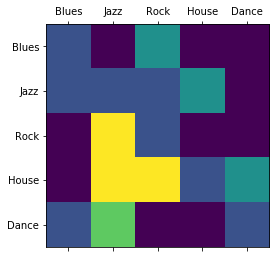

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#define the matrix (m)
m = [
[1,0,2,0,0],
[1,1,1,2,0],
[0,4,1,0,0],
[0,4,4,1,2],
[1,3,0,0,1],
]

plt.matshow(m)

#define the list (groups).
groups = ['Blues','Jazz','Rock','House','Dance']

#set the length to be equal to the length of the groups
x_pos = np.arange(len(groups))
y_pos = np.arange(len(groups))


#set the group names on the x axis and y axis 
plt.xticks(x_pos,groups)
plt.yticks(y_pos,groups)

plt.show()

### Heat map using seaborn 
#### 4.3 data

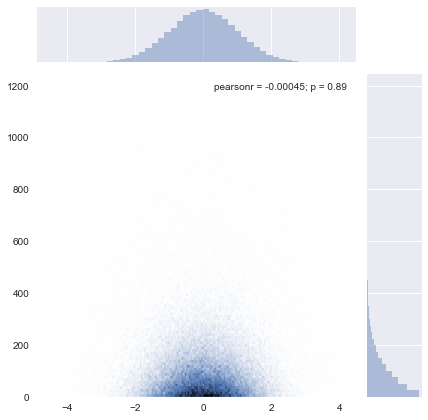

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some data 
# x is a generated from a normal random distribution 
# y is generated from a geometric random value witha p=.01 
x = np.random.randn(100000)
y = np.random.geometric(0.01, size=100000)

#use joint plot from seaborn
sns.jointplot(x=x, y=y, kind='hex')
plt.show()